### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

**Data Dictionary for Market Segmentation:**

* Amount spent by the customer per month (in 1000s)

* advance_payments: Amount paid by the customer in advance by cash (in 100s) 

* probability_of_full_payment: Probability of payment done in full by the customer to the bank 

* current_balance: Balance amount left in the account to make purchases (in 1000s) 

* credit_limit: Limit of the amount in credit card (10000s) 

* min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) 

* max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

#### 1.1 Read the data and do exploratory data analysis. Interpret the inferences for each 

In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [390]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [391]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


## EDA

In [392]:
df.shape

(210, 7)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [394]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [395]:
df.duplicated().sum()

0

In [396]:
df.describe()
# df.describe().loc[['mean','50%']]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>1. We see for most of the variable, mean/medium are nearly equal
        <br>2. the standard deviation of spending is higher as compared to other variables   
        variables are modernately and positively skewed except 
        'probability_of_full_payment' which is negatively skewed
       </span>    
</div>

## Univariate analysis

In [397]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [398]:
dfcolumns = list(df.columns.values)
dfcolumns

['spending',
 'advance_payments',
 'probability_of_full_payment',
 'current_balance',
 'credit_limit',
 'min_payment_amt',
 'max_spent_in_single_shopping']

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


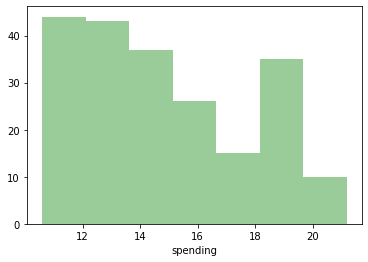

BoxPlot of spending
----------------------------------------------------------------------------


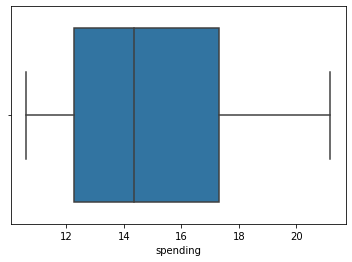

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


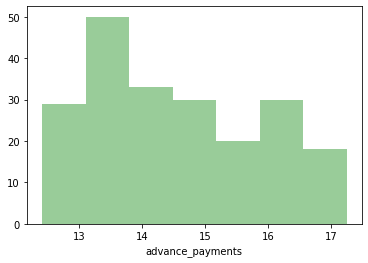

BoxPlot of advance_payments
----------------------------------------------------------------------------


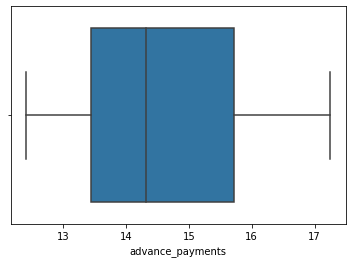

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


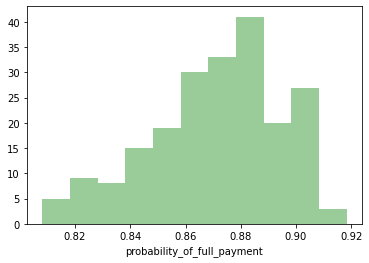

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


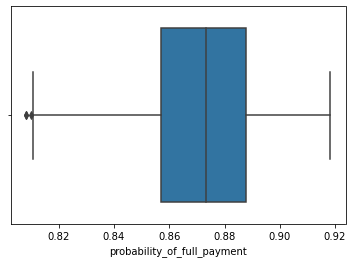

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


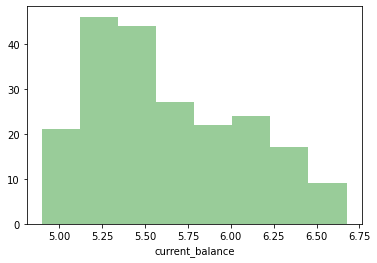

BoxPlot of current_balance
----------------------------------------------------------------------------


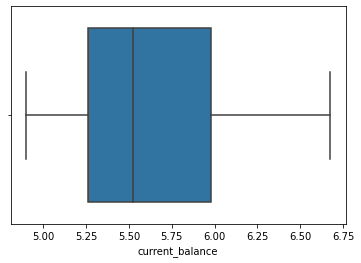

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


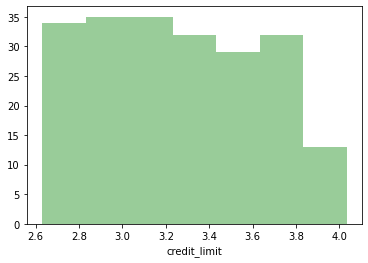

BoxPlot of credit_limit
----------------------------------------------------------------------------


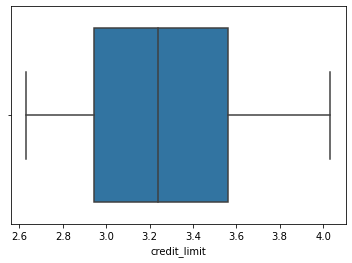

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


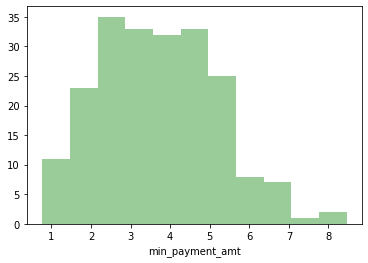

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


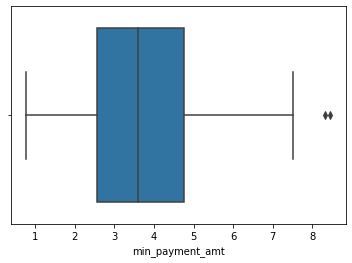

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


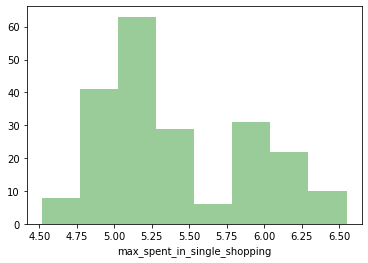

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


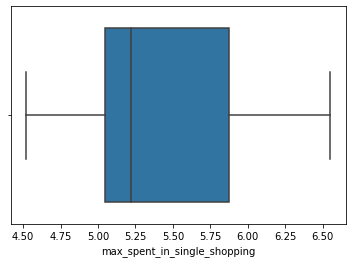

In [399]:
for x in dfcolumns:
    univariateAnalysis_numeric(x)

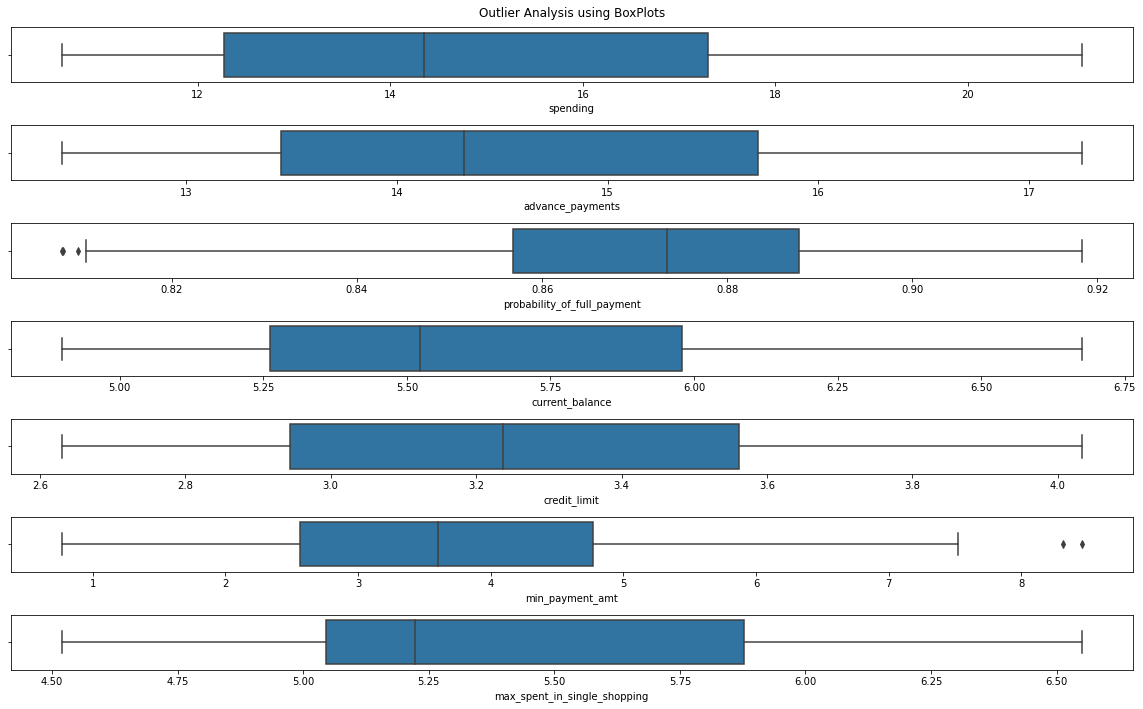

In [400]:
fig, ax = plt.subplots(7, figsize = (16, 10))
ax = ax.flatten()

for i, c in enumerate(df):
    sns.boxplot(x = df[c], ax = ax[i])
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

In [401]:
df.skew(axis = 0).sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

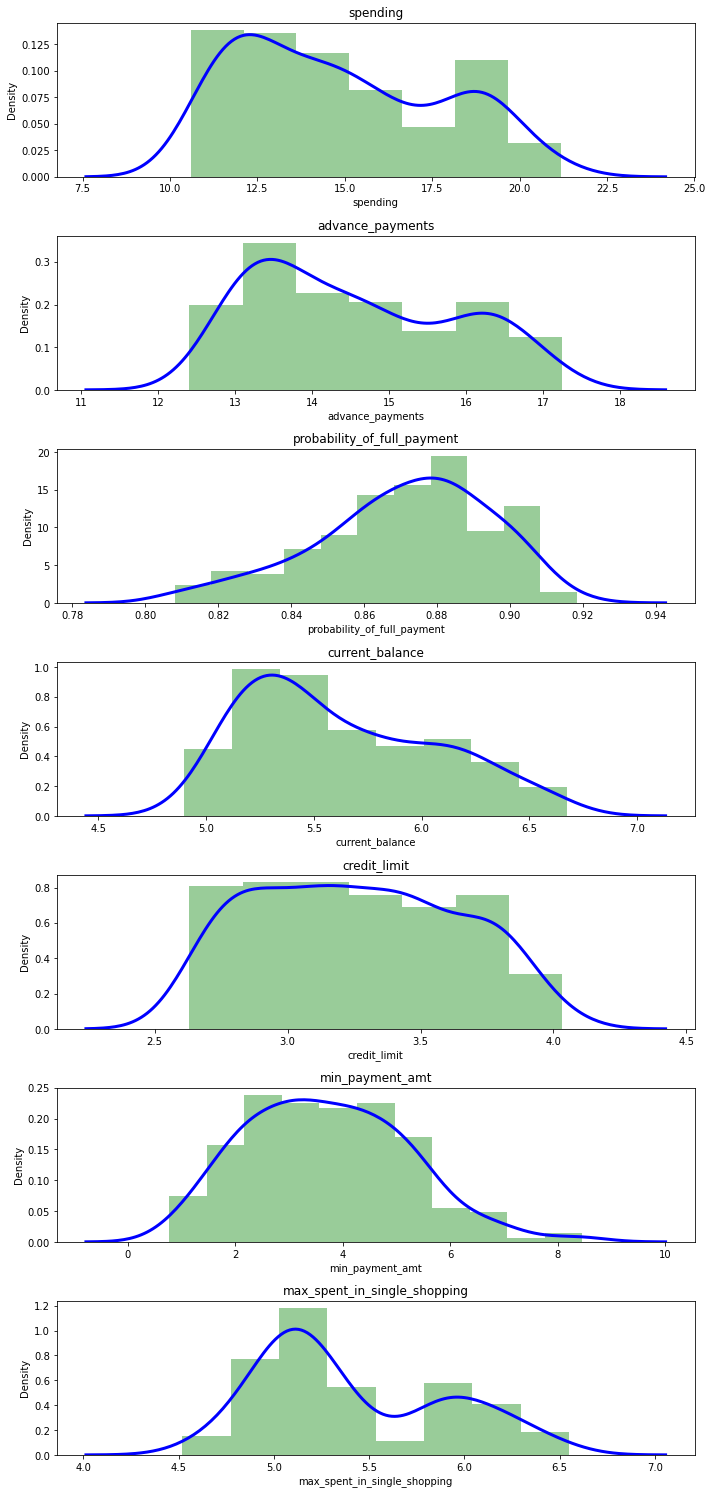

In [402]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>1. There are no missing values or duplicate values 
        <br>2. Looking at the distribution plot and skewness data, most   
        variables are modernately and positively skewed except 
        'probability_of_full_payment' which is negatively skewed
        <br>3. only 'probability_of_full_payment' and 'min_payment_amt' has outliers 
        <br>
       </span>    
</div>

### Bivariate analysis

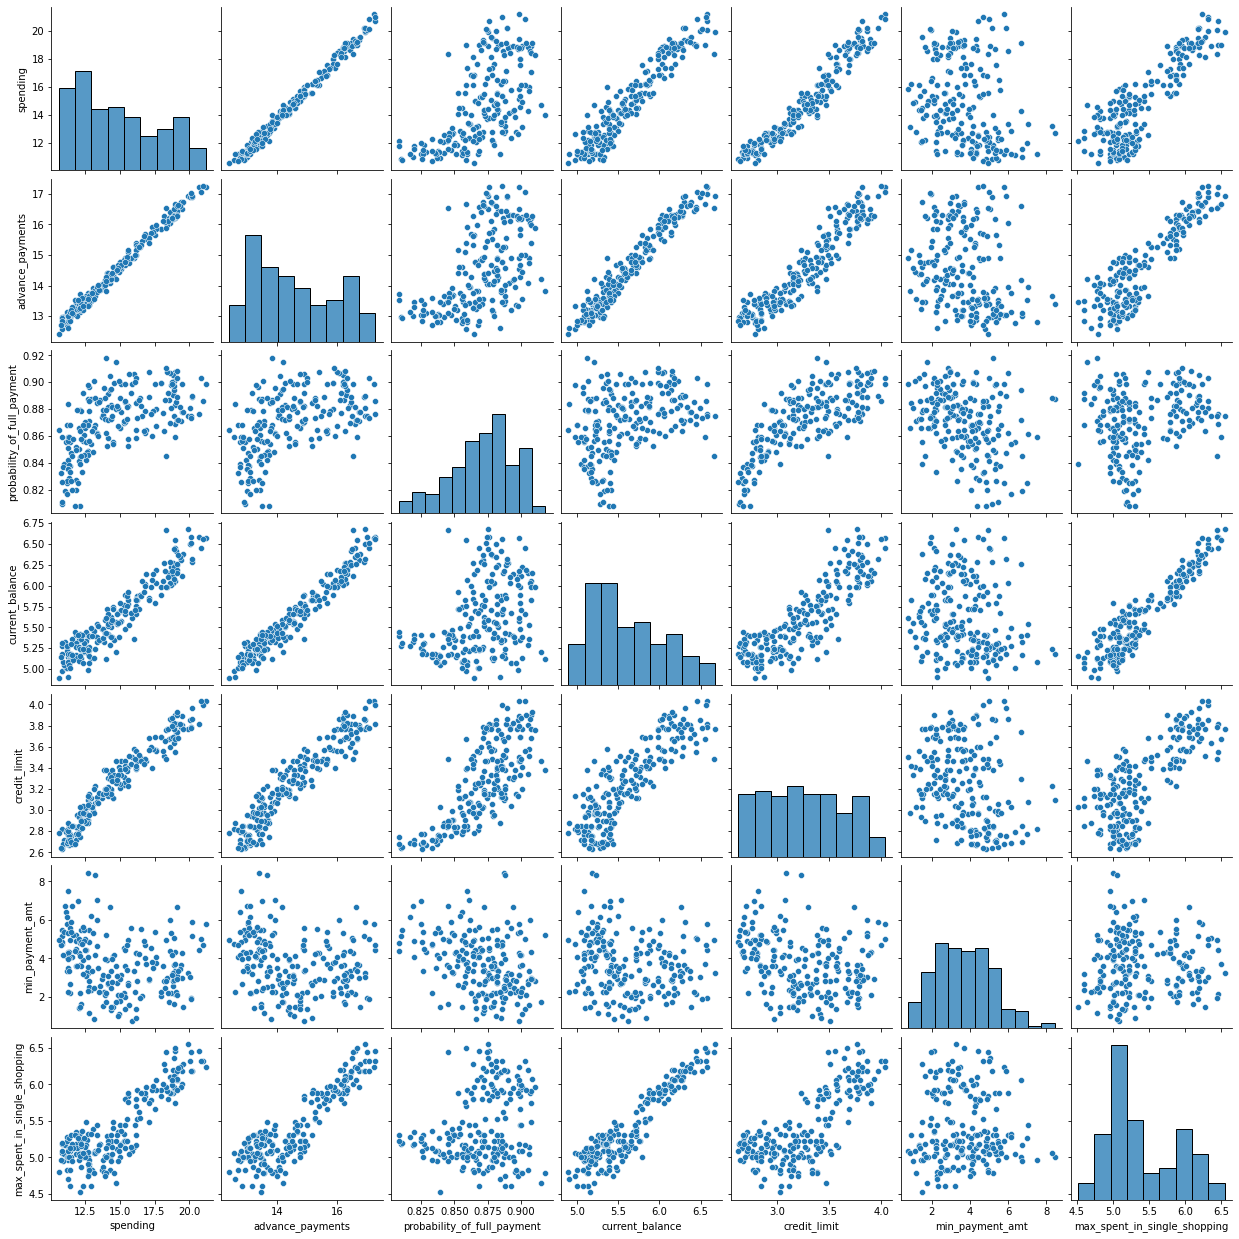

In [403]:
sns.pairplot(df)
plt.show()

In [404]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


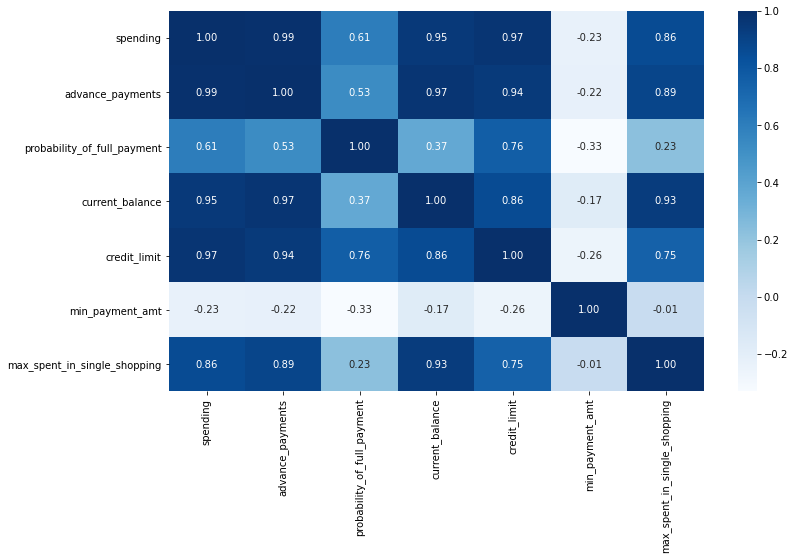

In [405]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br> There is medium to strong correlation between most variables except for min_payment_amt, which shows   
               negative correlation with other variables 
         </span>    
</div>

### Outlier Treatment


In [406]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75]) #find Q1 and Q3
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [407]:
lr,ur=remove_outlier(df['probability_of_full_payment'])
print("lower range",lr, "and upper range", ur)

lower range 0.8105875 and upper range 0.9340875


In [408]:
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>ur,ur,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lr,lr,df['probability_of_full_payment'])

<AxesSubplot:xlabel='probability_of_full_payment'>

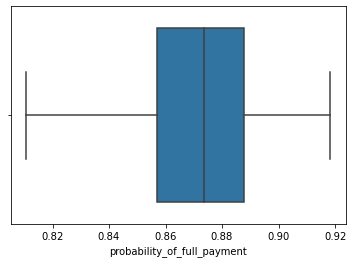

In [409]:
sns.boxplot(x=df.probability_of_full_payment)

In [410]:
lr,ur=remove_outlier(df['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

lower range -0.7493749999999992 and upper range 8.079625


In [411]:
df['min_payment_amt']=np.where(df['min_payment_amt']>ur,ur,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lr,lr,df['min_payment_amt'])

<AxesSubplot:xlabel='min_payment_amt'>

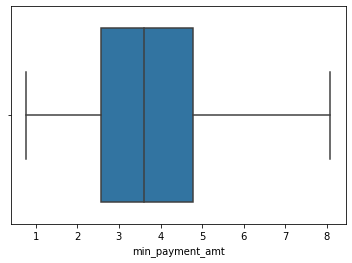

In [412]:
sns.boxplot(x=df.min_payment_amt)

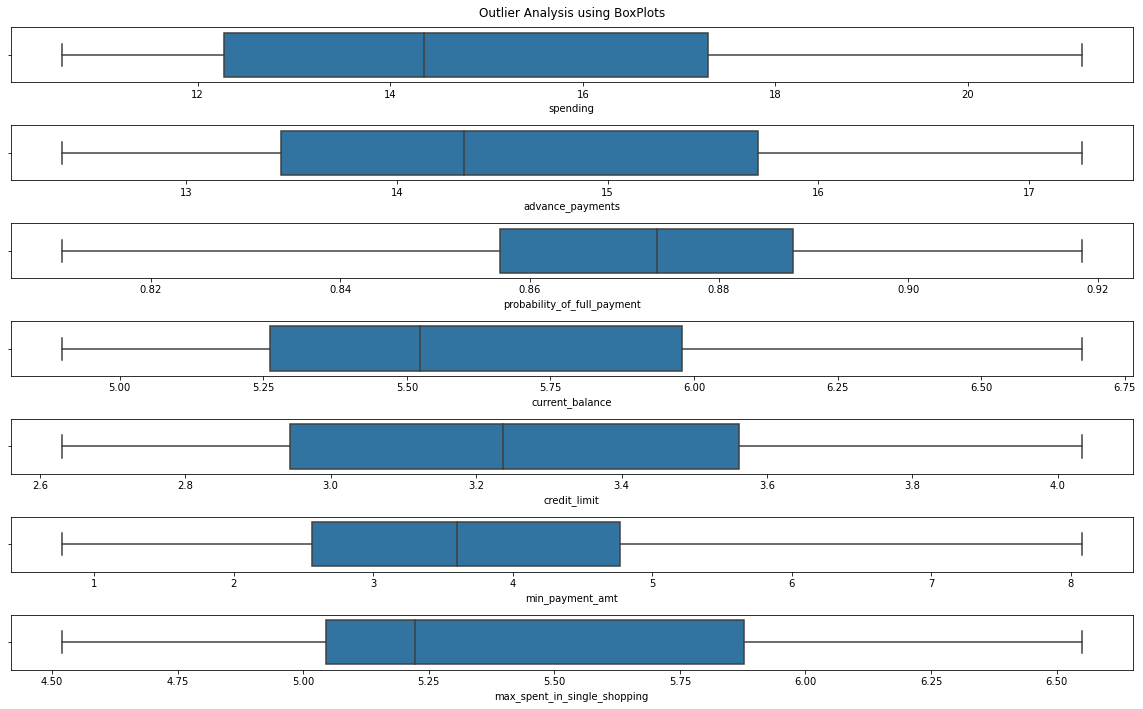

In [413]:
fig, ax = plt.subplots(7, figsize = (16, 10))
ax = ax.flatten()

for i, c in enumerate(df):
    sns.boxplot(x = df[c], ax = ax[i])
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

## Scaling

1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [414]:
from sklearn.preprocessing import StandardScaler

In [415]:
X= StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Why to Standardize: </b><br>
        <br> Clustering is a distance based algorithm. All distance based algorithms are affected by the scale of the variables. Since all the 7 variables have different ranges of values, it would be difficult for clustering algorithm to group and compare them. Hence scaling is done to standardize all values and for easy clustering. 
         </span>    
</div>




#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them. 

In [416]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [417]:
Hclust = linkage(scaled_df, method = 'ward')

In [418]:
linkage = linkage(scaled_df, method = 'average')

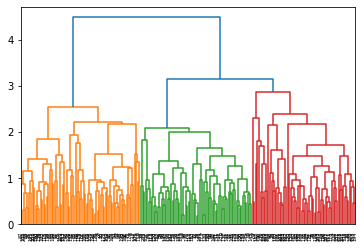

In [419]:
dend = dendrogram(linkage)


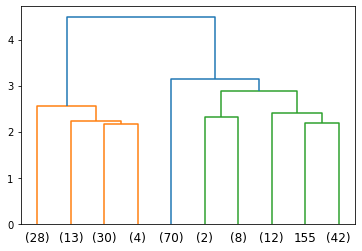

In [420]:
dend = dendrogram(linkage,
                 truncate_mode='lastp',
                 p = 10,
                 )

### fclustering

In [421]:
from scipy.cluster.hierarchy import fcluster

In [422]:
clusters = fcluster(linkage, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [423]:
df['clusters'] = clusters

In [424]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [425]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [426]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,
1,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


In [427]:
df.drop('clusters', axis=1, inplace=True)

### Agglomerative clustering

In [428]:
from sklearn.cluster import AgglomerativeClustering

In [429]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df)
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 2 0 2 0 2 2 0 0 1 2 2 2 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 0 0 1 2 0 0 2 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 2 2 2 1 0 2 1 2 0 0 1 1 1 0 1 2 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 2 0 0 2 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 2 2 2 0 0 2 0 1 0
 2 0 2 0 2 2 2 2 2 0 2 1 1 0 1 1 1 0 2 2 2 2 2 0 2 1 1 1 2 2 2 0 2 2 2 2 1
 1 2 2 2 0 2 2 0 1 2 1 1 0 1 0 2 1 2 0 1 2 1 2 2 2]


In [430]:
df["Agglo_CLusters"]=Cluster_agglo

In [431]:
df.Agglo_CLusters.value_counts().sort_index()

0    64
1    65
2    81
Name: Agglo_CLusters, dtype: int64

In [432]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,11.845781,13.234375,0.849104,5.226609,2.851266,5.047723,5.103094,64
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81


In [433]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,11.845781,13.234375,0.849104,5.226609,2.851266,5.047723,5.103094,64
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81


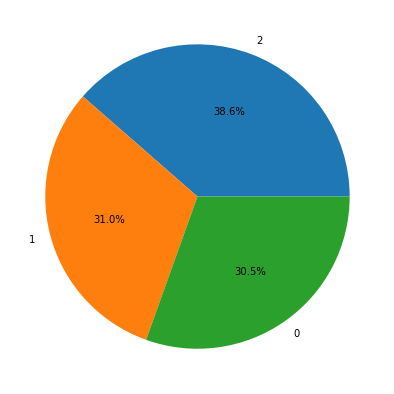

In [434]:
plt.figure(figsize= (7,7))
plt.pie(df['Agglo_CLusters'].value_counts(), labels = df['Agglo_CLusters'].value_counts().index,autopct= '%1.1f%%')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Clustering method: </b><br>
        <br> For the analysis of clusters in this case, agglomerative clustering, with linkage='average' and 
             distance='euclidean is being choosen because upon tring fcluastering method and other linkage methods, the 
             agglomerative gives much more distinctly profiled clusters </b><br>
        <br>Clustering profie:
        <br> Three clustering profiles are made, which approximately covers the max, min and median range of spending 
             amounts.They are described as follows:</b><br>
        <br> Cluster 1- this cluster spends the most, pays the most and also has high probability of full payment as 
                        compared to other two clusters. 35.7 customers fall in this cluster
         <br>Cluster 2- this cluster relatively spends the least, pays less and has good probability of full payment but 
                        the probabilty is lower as compared to other two clusters. 31% customers fall in this cluster
         <br>Cluster 0- this is the cluster where 33.3% customers fall and stands in the middle of cluster 1 and 2 in terms of spending and payments. 
                        It's probabilty of payment to bank by cans is higher than cluster 2 but lower than cluaster 1
         </span>    
</div>

### KMeans

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters

In [435]:
from sklearn.cluster import KMeans

In [436]:
wss =[] 

In [437]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [438]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.2217639268478,
 326.71808115771694,
 288.950694543177,
 261.4398675937925,
 242.43728385218174,
 223.48788914443654,
 208.07396263329508]

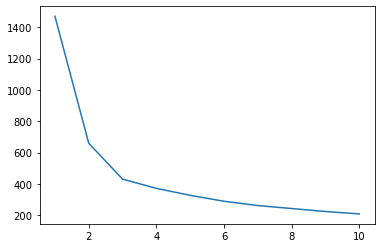

In [439]:
plt.plot(range(1,11), wss)

In [440]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [441]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [442]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_CLusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [443]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [444]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [445]:
sil_width = silhouette_samples(scaled_df,labels)

In [446]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_CLusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.360972


In [447]:
silhouette_samples(scaled_df,labels).min()

0.0027685411286160638

In [448]:
kmeans_data=df.groupby('Clus_kmeans').mean()
kmeans_data['Freq']=df.Clus_kmeans.value_counts().sort_index()
kmeans_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_CLusters,sil_width,Freq
Clus_kmeans,,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468077,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.277778,0.399556,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,1.943662,0.338593,71


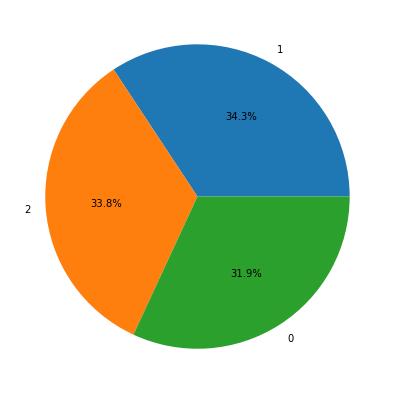

In [449]:
plt.figure(figsize= (7,7))
plt.pie(df['Clus_kmeans'].value_counts(), labels = df['Clus_kmeans'].value_counts().index,autopct= '%1.1f%%')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Number of clusters: </b><br>
        <br> The wss plot showed us that elbow is being formed at n= 2 and 3. Here 2 clusters don't make bsuiness sense and even though we get better silhoutte score. With n=3 we can distinctly classify 3 clusters and the silhoutte score is also positive and above 0 which means that clusters, to a decent extent, apart from each other. If we choose n>3, the silhoutte score reduces, leading to overlapping of clusters </b><br>
        <br>Clustering profie:
        <br> Three clustering profiles are made, which approximately covers the max, min and median range of spending 
             amounts.They are described as follows:</b><br>
        <br> KCluster 1- this cluster relatively spends the least, pays less and has good probability of full payment but 
                        the probabilty is lower as compared to other two clusters. 32.4% customers fall in this cluster
         <br>KCluster 2- this is the cluster where 34.3% of customers fall and stands in the middle of cluster 1 and 2 in 
                         terms of spending and payments.
         <br>KCluster 0- this cluster spends the most, pays the most and also has high probability of full payment as 
                        compared to other two clusters. 33.3% customers fall in this cluster
                        It's probabilty of payment to bank by cans is higher than cluster 2 but lower than cluaster 1
         </span>    
</div>

1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Based on both Heirarichal clustering and KMeans clustering we arrive three clusters, which can be labelled as:
        <b>a) High Spender
        <b>b) Medium Spenders
        <b>c) Low Spenders
        <b> For profiling theses clusters in detail, Hierarical Agglomerative clustering information will be used since it gives better gap and distinction level between three levels 
            
           
</div>

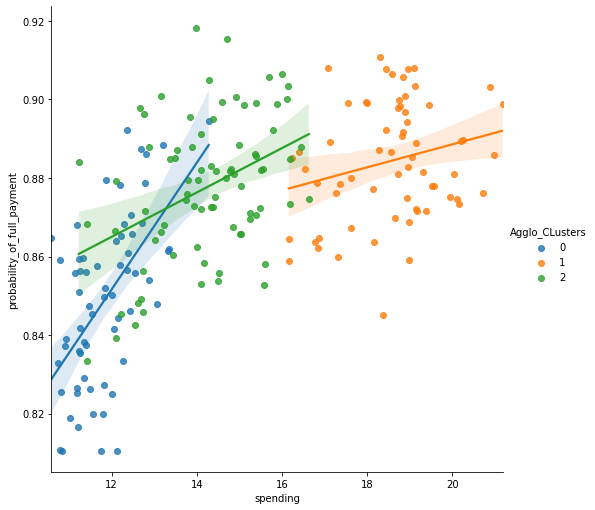

In [450]:
sns.lmplot(x='spending', y='probability_of_full_payment', hue= 'Agglo_CLusters', data= df, height= 7)
plt.show()

<AxesSubplot:xlabel='Agglo_CLusters', ylabel='spending'>

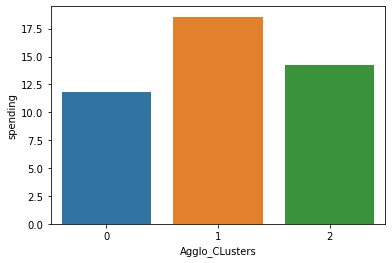

In [451]:
sns.barplot(x= df['Agglo_CLusters'], y=df['spending'], estimator = np.average, data=df, ci=None)


<AxesSubplot:xlabel='Agglo_CLusters', ylabel='credit_limit'>

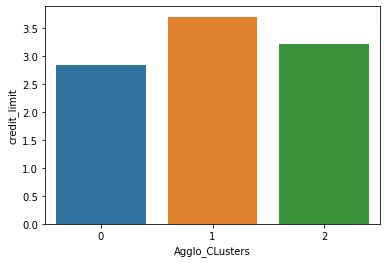

In [452]:
sns.barplot(x= df['Agglo_CLusters'], y=df['credit_limit'], estimator = np.average, data=df, ci=None)


<AxesSubplot:xlabel='Agglo_CLusters', ylabel='max_spent_in_single_shopping'>

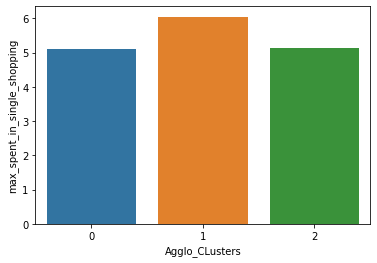

In [453]:
sns.barplot(x= df['Agglo_CLusters'], y=df['max_spent_in_single_shopping'], estimator = np.average, data=df, ci=None)


<AxesSubplot:xlabel='Agglo_CLusters', ylabel='probability_of_full_payment'>

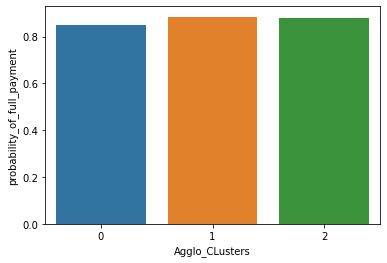

In [454]:
sns.barplot(x= df['Agglo_CLusters'], y=df['probability_of_full_payment'], estimator = np.average, data=df, ci=None)


<AxesSubplot:xlabel='Agglo_CLusters', ylabel='advance_payments'>

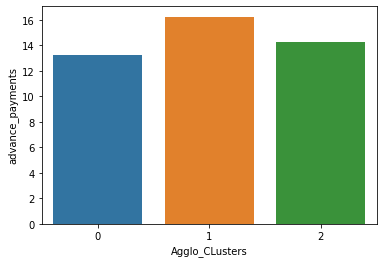

In [455]:
sns.barplot(x= df['Agglo_CLusters'], y=df['advance_payments'], estimator = np.average, data=df, ci=None)


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Cluster 1: </b><br>
        <br> This is the high spending consumer segement which constitute 31% of the consumers. Since they have good probability of payment and spends a lot, their credit limit can be increased. 
        <br> Their spending range is in the range of affluent class, so discounts could be given in the premium labelled brands. This could be discred from more detailed data on where they shop, which can help in knowing which brands to tie up with to give special discounts. 
        <br> give them more credit point benefit to increase their spending    </b><br> 
        <br>Cluster 2:</b><br>
        <br> This is the medium spending consumer segement which constitute 38.6% of the consumers
        <br> Their credit limit should also be increased since they have good probability of repayment and sepnds the second highest and also constitute the largest consumer segment for the bank's credit card
        <br> Since their spending range is in the middle class range, they are probably spending on everyday expenses. So they sohld be given quick small credit benefits to incentivise spending through credit card. 
        <br> having more demographical data might help in discerning the consumer profile, which could further be clustered to generate specific credit based shopping incentive.  </b><br>
         <br>Cluster 3:</b><br>
         <br> This is the low spending consumer segement which constitute 30.4% of the consumers. Their probability of repayment is slightly less the other two segments, but mechanisms should be set up to improve their repament probability. Perhaps, incentive of lowering the interest on timely payment can help to achieve timely payments and more spending as well. 
         </span>    
</div>